<a href="https://colab.research.google.com/github/Tejasri1610/Climate-Change/blob/main/LSTM%2BGRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Cleaned_Global_Temperature.csv to Cleaned_Global_Temperature.csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving sealevel_cleaned.csv to sealevel_cleaned.csv


In [ ]:
temp_df = pd.read_csv("/content/Cleaned_Global_Temperature.csv")
temp_df.columns = ["Year", "Temperature_Anomaly"]

sea_df = pd.read_csv("/content/sealevel_cleaned.csv")
sea_df.columns = ["Year", "Sea_Level"]
sea_df = sea_df.groupby("Year").mean().reset_index()

In [ ]:
merged_df = pd.merge(temp_df, sea_df, on="Year", how="inner")

# ✅ Normalize Data
scaler_temp = MinMaxScaler()
scaler_sea = MinMaxScaler()
merged_df[["Temperature_Anomaly"]] = scaler_temp.fit_transform(merged_df[["Temperature_Anomaly"]])
merged_df[["Sea_Level"]] = scaler_sea.fit_transform(merged_df[["Sea_Level"]])


In [ ]:
# ✅ Prepare Time Series Data
def create_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 5
X_temp, y_temp = create_sequences(merged_df["Temperature_Anomaly"].values, time_steps)
X_sea, y_sea = create_sequences(merged_df["Sea_Level"].values, time_steps)


In [ ]:
X_temp = X_temp.reshape(X_temp.shape[0], X_temp.shape[1], 1)
X_sea = X_sea.reshape(X_sea.shape[0], X_sea.shape[1], 1)

In [ ]:
def build_model():
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
        GRU(50, return_sequences=False),
        Dense(25, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
temp_model = build_model()
temp_model.fit(X_temp, y_temp, epochs=50, batch_size=8, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.3801
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2832 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1731
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1134
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0410
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0297
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0414
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0419
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0275
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0257
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0220
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0256
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0209
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0195
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0254
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━

In [ ]:
sea_model = build_model()
sea_model.fit(X_sea, y_sea, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.4056
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2564
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2052
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1203
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0638
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0219
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0258
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0351 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0167
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0096
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0113
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0120
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0092 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━

In [ ]:
temp_pred = temp_model.predict(X_temp)
sea_pred = sea_model.predict(X_sea)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


In [ ]:
future_steps = 6  # Predict from 2025 to 2030
X_future_temp = X_temp[-1].reshape(1, time_steps, 1)
X_future_sea = X_sea[-1].reshape(1, time_steps, 1)

future_temp_pred = []
future_sea_pred = []

for _ in range(future_steps):
    temp_next = temp_model.predict(X_future_temp)[0, 0]
    sea_next = sea_model.predict(X_future_sea)[0, 0]

    future_temp_pred.append(temp_next)
    future_sea_pred.append(sea_next)

    X_future_temp = np.roll(X_future_temp, -1, axis=1)
    X_future_temp[0, -1, 0] = temp_next

    X_future_sea = np.roll(X_future_sea, -1, axis=1)
    X_future_sea[0, -1, 0] = sea_next


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
temp_pred = scaler_temp.inverse_transform(temp_pred)
sea_pred = scaler_sea.inverse_transform(sea_pred)
future_temp_pred = scaler_temp.inverse_transform(np.array(future_temp_pred).reshape(-1, 1))
future_sea_pred = scaler_sea.inverse_transform(np.array(future_sea_pred).reshape(-1, 1))

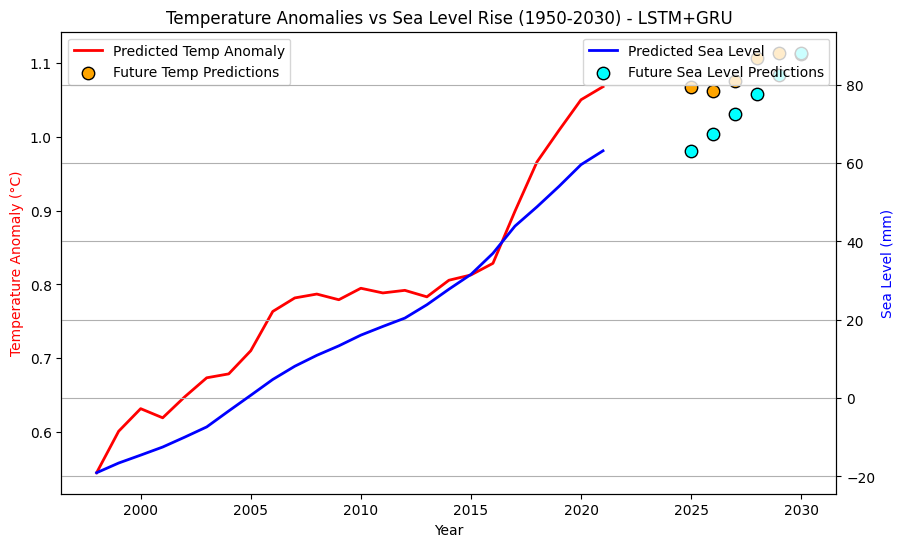

In [ ]:
years = merged_df["Year"].values[time_steps:]
future_years = np.arange(2025, 2031)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature Anomaly (°C)", color="red")
ax1.plot(years, temp_pred, color="red", linewidth=2, label="Predicted Temp Anomaly")
ax1.scatter(future_years, future_temp_pred, color="orange", edgecolors="black", s=80, label="Future Temp Predictions")

ax2 = ax1.twinx()
ax2.set_ylabel("Sea Level (mm)", color="blue")
ax2.plot(years, sea_pred, color="blue", linewidth=2, label="Predicted Sea Level")
ax2.scatter(future_years, future_sea_pred, color="cyan", edgecolors="black", s=80, label="Future Sea Level Predictions")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title("Temperature Anomalies vs Sea Level Rise (1950-2030) - LSTM+GRU")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

In [ ]:
temp_df = pd.read_csv("/content/Cleaned_Global_Temperature.csv")
temp_df.columns = ["Year", "Temperature_Anomaly"]

sea_df = pd.read_csv("/content/sealevel_cleaned.csv")
sea_df.columns = ["Year", "Sea_Level"]
sea_df = sea_df.groupby("Year").mean().reset_index()

In [ ]:
# ✅ Merge Data
merged_df = pd.merge(temp_df, sea_df, on="Year", how="inner")

# ✅ Normalize Data
scaler_temp = MinMaxScaler()
scaler_sea = MinMaxScaler()
temperature_anomaly = scaler_temp.fit_transform(merged_df[["Temperature_Anomaly"]])
sea_level = scaler_sea.fit_transform(merged_df[["Sea_Level"]])

In [ ]:
# ✅ Create Time-Series Sequences
def create_sequences(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 5
X_temp, y_temp = create_sequences(temperature_anomaly, seq_length)
X_sea, y_sea = create_sequences(sea_level, seq_length)

In [ ]:
# ✅ Build LSTM-GRU Model
def build_model():
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
        GRU(50, return_sequences=False),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
# ✅ Train Models
model_temp = build_model()
model_temp.fit(X_temp, y_temp, epochs=100, batch_size=16, verbose=0)

model_sea = build_model()
model_sea.fit(X_sea, y_sea, epochs=100, batch_size=16, verbose=0)

In [ ]:
# ✅ Predict Future Values
future_years = np.arange(2025, 2031)
def predict_future(model, last_sequence, steps):
    predictions = []
    current_input = last_sequence.copy()
    for _ in range(steps):
        pred = model.predict(current_input.reshape(1, seq_length, 1), verbose=0)
        predictions.append(pred[0, 0])
        current_input = np.roll(current_input, -1)
        current_input[-1] = pred
    return np.array(predictions)

future_temp = predict_future(model_temp, X_temp[-1], len(future_years))
future_sea = predict_future(model_sea, X_sea[-1], len(future_years))


In [ ]:
# ✅ Denormalize
future_temp = scaler_temp.inverse_transform(future_temp.reshape(-1, 1)).flatten()
future_sea = scaler_sea.inverse_transform(future_sea.reshape(-1, 1)).flatten()

In [ ]:

# ✅ Interactive Year-Wise Prediction
while True:
    year_input = input("Enter a year (or type 'exit' to quit): ")
    if year_input.lower() == "exit":
        print("👋 Exiting program. Stay safe! 🌍")
        break
    try:
        year_input = int(year_input)
        if year_input in future_years:
            index = np.where(future_years == year_input)[0][0]
            print(f"📅 Year: {year_input}")
            print(f"🔥 Predicted Temperature Anomaly: {future_temp[index]:.2f}°C")
            print(f"🌊 Predicted Sea Level Rise: {future_sea[index]:.2f} mm")
        else:
            print("❌ Year out of prediction range (2025-2030). Try another year.")
    except ValueError:
        print("❌ Invalid input! Please enter a valid year or 'exit'.")

Enter a year (or type 'exit' to quit): 2027
📅 Year: 2027
🔥 Predicted Temperature Anomaly: 1.08°C
🌊 Predicted Sea Level Rise: 72.01 mm
Enter a year (or type 'exit' to quit): exit
👋 Exiting program. Stay safe! 🌍


In [ ]:
merged_df = pd.merge(temp_df, sea_df, on="Year", how="inner")

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df[["Temperature_Anomaly", "Sea_Level"]])

In [ ]:
# ✅ Prepare Data for LSTM-GRU
X, y = [], []
time_steps = 10
for i in range(len(scaled_data) - time_steps):
    X.append(scaled_data[i:i + time_steps])
    y.append(scaled_data[i + time_steps])
X, y = np.array(X), np.array(y)


In [ ]:
# ✅ Build LSTM-GRU Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, 2)),
    GRU(64, return_sequences=False),
    Dense(2)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# ✅ Train Model
model.fit(X, y, epochs=100, batch_size=8, verbose=1)

# ✅ Predict Future Values (2025-2030)
future_years = np.arange(2025, 2031)
predictions = []
input_seq = scaled_data[-time_steps:]
for _ in range(len(future_years)):
    pred = model.predict(input_seq.reshape(1, time_steps, 2))
    predictions.append(pred[0])
    input_seq = np.vstack([input_seq[1:], pred])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.3342
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2152
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0522
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0169
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0462
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0300
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0145
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0144
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0173
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0187
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0157
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0115 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0117
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0128
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0112
Epoch 16/100
3/3 ━

In [ ]:
# ✅ Convert Predictions Back to Original Scale
predictions = scaler.inverse_transform(predictions)
future_df = pd.DataFrame({"Year": future_years, "Temperature_Anomaly": predictions[:, 0], "Sea_Level": predictions[:, 1]})

# ✅ Combine with Original Data
full_df = pd.concat([merged_df, future_df], ignore_index=True)

# ✅ Normalize for Heatmap
full_df["Temp_Norm"] = (full_df["Temperature_Anomaly"] - full_df["Temperature_Anomaly"].min()) / \
                        (full_df["Temperature_Anomaly"].max() - full_df["Temperature_Anomaly"].min())

full_df["Sea_Norm"] = (full_df["Sea_Level"] - full_df["Sea_Level"].min()) / \
                       (full_df["Sea_Level"].max() - full_df["Sea_Level"].min())

In [ ]:
# ✅ Create Pivot Table for Heatmap
heatmap_data = full_df.pivot(index="Year", columns="Temp_Norm", values="Sea_Norm")


In [ ]:
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt


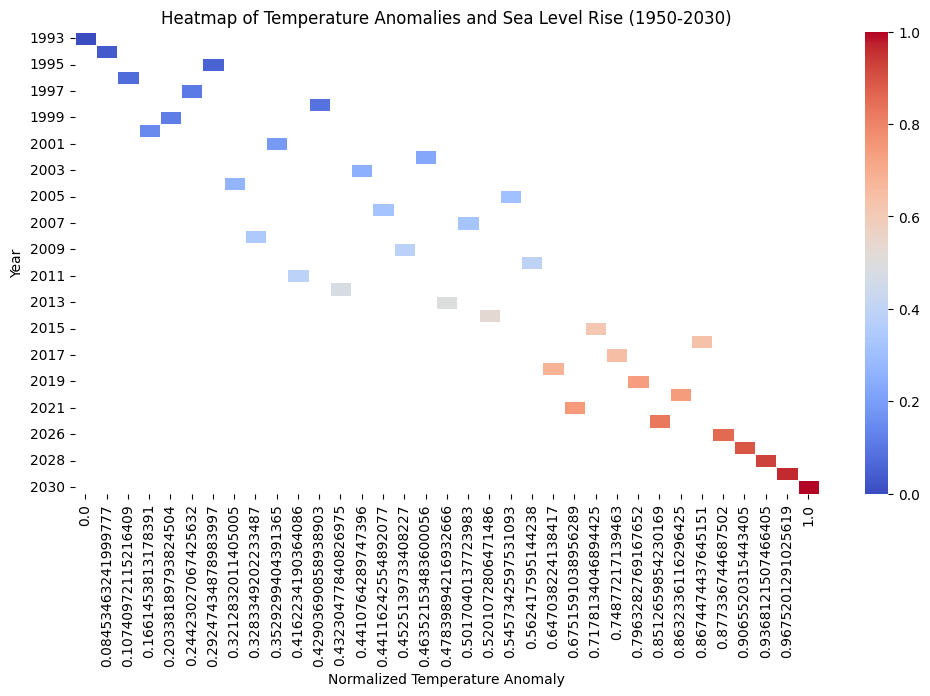

In [ ]:
# ✅ Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Heatmap of Temperature Anomalies and Sea Level Rise (1950-2030)")
plt.xlabel("Normalized Temperature Anomaly")
plt.ylabel("Year")
plt.show()
